### 1. Meet Dr. Ignaz Semmelweis who discovered the importance of handwashing
This is Dr. Ignaz Semmelweis, a Hungarian physician born in 1818 and active at the Vienna General Hospital. If Dr. Semmelweis looks troubled it's probably because he's thinking about childbed fever: A deadly disease affecting women that just have given birth. He is thinking about it because in the early 1840s at the Vienna General Hospital as many as 10% of the women giving birth die from it. He is thinking about it because he knows the cause of childbed fever: 

- It's the contaminated hands of the doctors delivering the babies. And they won't listen to him and wash their hands!

In this notebook, we're going to reanalyze the data that made Semmelweis discover the importance of handwashing. Let's start by looking at the data that made Semmelweis realize that something was wrong with the procedures at Vienna General 

In [1]:
# Importing modules
import pandas as pd
import os as os
# Read datasets/yearly_deaths_by_clinic.csv into yearly
current_dir = os.getcwd()
print(current_dir)

# Create file path
my_file = os.path.join(current_dir, 'datasets', 'yearly_deaths_by_clinic.csv')

# Load data to yearly table
with open(my_file, mode='r') as file:
    yearly = pd.read_csv(file)

# Print out yearly
yearly.head()

D:\datacamp\Project\P5 Dr. Semmelweis and the Discovery of Handwashing


,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


### 2. The alarming number of deaths

The table above shows the number of women giving birth at the two clinics at the Vienna General Hospital for the years 1841 to 1846. You'll notice that giving birth was very dangerous; an alarming number of women died as the result of childbirth, most of them from childbed fever.

- find the ratio/proportion of deaths out of the births at Clinic 1.

In [2]:
# Calculate proportion of deaths per no. births
yearly['proportion_deaths'] = yearly['deaths']/yearly['births']

# Extract Clinic 1 data into clinic_1 and Clinic 2 data into clinic_2
clinic_1 = yearly[yearly['clinic'] =='clinic 1']  
clinic_2 = yearly[yearly['clinic'] =='clinic 2'] 

# Print out clinic_1
clinic_1.head()

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015


### 3. Death at the clinics pattern
- plot the proportion of deaths at both Clinic 1 and Clinic 2  

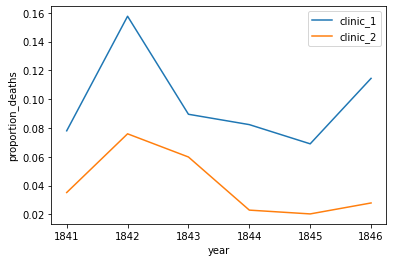

In [9]:
# This makes plots appear in the notebook
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plot yearly proportion of deaths at the two clinics
ax = sns.lineplot(x='year', y='proportion_deaths', data = clinic_1)
ax = sns.lineplot(x='year', y='proportion_deaths', data = clinic_2)
plt.legend(labels=["clinic_1","clinic_2"])
plt.show()

### 4. The handwashing begins

Why is the proportion of deaths consistently so much **higher in Clinic 1**? Semmelweis saw the same pattern and was puzzled and distressed. The only **difference** between the clinics was that many medical students served at Clinic 1, while mostly midwife students served at Clinic 2. While the midwives only tended to the women giving birth, the medical students also spent time in the autopsy rooms examining corpses.

Semmelweis started to suspect that something on the corpses spread from the hands of the medical students, caused childbed fever. So in a desperate attempt to stop the high mortality rates, he decreed: Wash your hands! This was an unusual and disputable request, **nobody** in Vienna knew about **bacteria** at this point in time.

- load in monthly data from Clinic 1 to see if the handwashing had any effect 

In [10]:
# create file path
my_2nd_file=os.path.join(current_dir, 'datasets', 'monthly_deaths.csv')

# load date to monthly table
with open(my_2nd_file, mode='r') as file:
    # Read datasets/monthly_deaths.csv into monthly
    monthly = pd.read_csv(file,parse_dates=['date']) # from object to datetime object

# Calculate proportion of deaths per no. births
monthly["proportion_deaths"]=monthly['deaths']/monthly['births']

# Print out the first rows in monthly
monthly.head()

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


### 5. The effect of handwashing
- look at the proportion of deaths over time.

In the plot below we haven't marked where obligatory handwashing started, but it reduced the proportion of deaths to such a degree that you should be able to spot it!

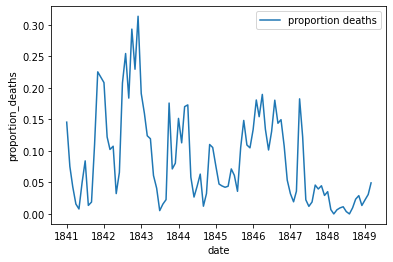

In [13]:
# Plot monthly proportion of deaths
ax =  sns.lineplot(x = 'date', y = 'proportion_deaths', data = monthly)
plt.legend(['proportion deaths'])
plt.show()

### 6. The effect of handwashing highlighted - visualize before and after handwashing 

 - plot in two colors of handwashing before and after starting from the summer of 1847 
 - the proportion of deaths is drastically reduced 

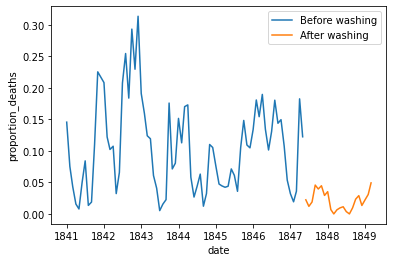

In [17]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01') # conver to datetime object

# Split monthly into before and after handwashing_start
before_washing = monthly[monthly["date"] < handwashing_start]
after_washing = monthly[monthly["date"] >= handwashing_start]

# Plot monthly proportion of deaths before and after handwashing
ax =  sns.lineplot(x = 'date', y = 'proportion_deaths', data = before_washing)
ax =  sns.lineplot(x = 'date', y = 'proportion_deaths', data = after_washing)
plt.legend(['Before washing','After washing'])
plt.show()

### 7. More handwashing, fewer deaths?
- How much did it reduce the monthly proportion of deaths on average?
- extract pd serise object and calculate mean of columns

In [31]:
import numpy as np
# Difference in mean monthly proportion of deaths due to handwashing
before_proportion_mean = before_washing['proportion_deaths'].mean()
after_proportion_mean = after_washing['proportion_deaths'].mean()
mean_diff = before_proportion_mean - after_proportion_mean

# print the results
print('The mean of befor handwahsing is {:.2f}'.format(before_proportion_mean))
print('The mean of after handwahsing is {:.2f}'.format(after_proportion_mean))
print('The mean difference befor and after handwahsing is {:.2f}'.format(mean_diff))

The mean of befor handwahsing is 0.11
The mean of after handwahsing is 0.02
The mean difference befor and after handwahsing is 0.08


### 8. A Bootstrap analysis of Semmelweis handwashing data

It reduced the proportion of deaths by around 8 percentage points! 
From 10% on average to just 2% (which is still a high number by modern standards).

- look at a confidence interval (here calculated using the bootstrap method).

In [45]:
# A bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(3000):
    boot_before = np.random.choice(before_washing['proportion_deaths'],size=len(before_washing['proportion_deaths']))
    boot_after = np.random.choice(after_washing['proportion_deaths'],size=len(after_washing['proportion_deaths']))
    boot_mean_diff.append(np.mean(boot_before)-np.mean(boot_after))

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = np.percentile(boot_mean_diff, [2.5, 97.5])
confidence_interval

# print results
print('The bootstrap mean is {:.3f}'.format(np.mean(boot_mean_diff)))
print('The boostrap 95% confidence interval is {:.3f} and {:.3f}'.format(confidence_interval[0],confidence_interval[1]))

The bootstrap mean is 0.084
The boostrap 95% confidence interval is 0.068 and 0.101


### 9. The fate of Dr. Semmelweis

So handwashing reduced the proportion of deaths by between 6.7 and 10 percentage points, according to a 95% confidence interval. All in all, it would seem that Semmelweis had solid evidence that handwashing was a simple but highly effective procedure that could save many lives.

The tragedy is that, despite the evidence, Semmelweis' theory — that childbed fever was caused by some "substance" (what we today know as bacteria) from autopsy room corpses — was ridiculed by contemporary scientists. The medical community largely rejected his discovery and in 1849 he was forced to leave the Vienna General Hospital for good.

One reason for this was that statistics and statistical arguments were uncommon in medical science in the 1800s. Semmelweis only published his data as long tables of raw data, but he didn't show any graphs nor confidence intervals. If he would have had access to the analysis we've just put together he might have been more successful in getting the Viennese doctors to wash their hands.

In [46]:
# The data Semmelweis collected points to that:
doctors_should_wash_their_hands = True